## Using Pandas and Matplotlib

Pandas also provides us with a simple interface to Matplotlib, so that we can plot data stored as a Series or Data frame. 

In [2]:
import pandas as pd
import matplotlib
# still need to tell IPython to display plots within the notebook
%matplotlib inline

### Line Plots

We can generate a simple line plot directly from a Pandas Series. First we will load the data:

In [3]:
salesdata = pd.read_csv("sales-years.csv",index_col="Month")
salesdata

,2014,2015,2016
Month,,,
jan,203.92,206.92,144.84
feb,242.21,318.77,343.29
mar,267.73,270.73,351.95
apr,401.88,445.37,283.42
may,419.72,464.99,464.99
jun,363.75,256.73,440.10
jul,312.28,409.86,409.86
aug,413.68,375.01,375.01
sep,552.27,444.22,555.27


First, we can create a single line chart for the Series corresponding to the column with the index *2014* by calling the *plot()* function on that Series:

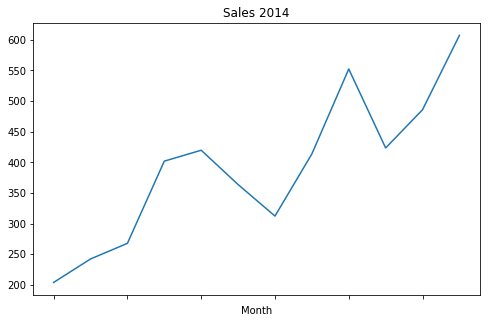

In [4]:
# Line plot, include a title
p = salesdata["2014"].plot(title="Sales 2014",figsize=(8,5))

We can also plot all years (columns) as lines on the same chart by calling the *plot()* function on the Data Frame. A legend will be automatically included.

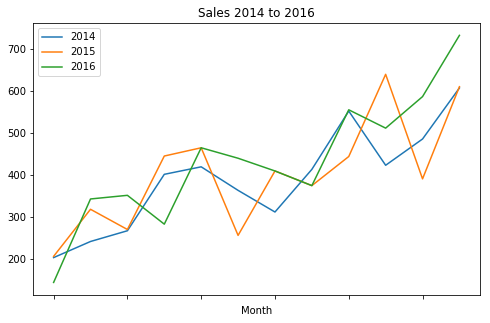

In [5]:
p = salesdata.plot(title="Sales 2014 to 2016",figsize=(8,5))

We can display each series on a separate subplot (i.e. **small multiples**) by setting *subplots=True*. We ensure that the y-axes all have the same range using *sharey=True*, so that we can easily make visual comparisons.

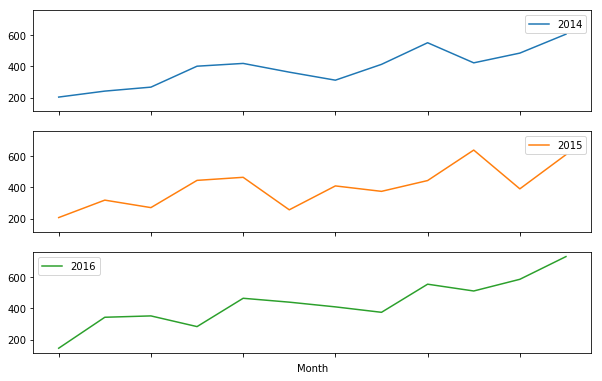

In [6]:
p = salesdata.plot(subplots=True,figsize=(10, 7), sharey=True)

### Bar Plots

Create a sample DataFrame with results for 4 assignments submitted by 6 students:

In [7]:
scores = {'first_name': ['John', 'Molly', 'Amy', 'Mary', 'Paul', 'Alice'],
        'assignment1': [15, 10, 23, 16, 9, 11],
        'assignment2': [21, 13, 25, 18, 19, 13],
        'assignment3': [23, 16, 17, 19, 17, 22],
        'assignment4': [18, 18, 19, 19, 18, 20], }
df = pd.DataFrame(scores, columns = ['first_name', 'assignment1', 'assignment2', 'assignment3','assignment4'])
df = df.set_index("first_name")
df

,assignment1,assignment2,assignment3,assignment4
first_name,,,,
John,15,21,23,18
Molly,10,13,16,18
Amy,23,25,17,19
Mary,16,18,19,19
Paul,9,19,17,18
Alice,11,13,22,20


Create a simple bar chart for a single assignment:

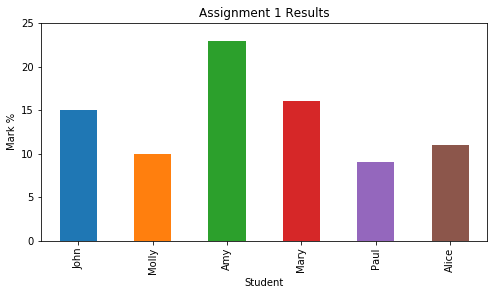

In [8]:
p = df["assignment1"].plot.bar(figsize=(8, 4))
# customize the axes and title
p.set_ylim((0,25))
p.set_xlabel("Student")
p.set_ylabel("Mark %")
p.set_title("Assignment 1 Results")

We can also generate bar charts for all assignments (i.e. all columns in the DataFrame):

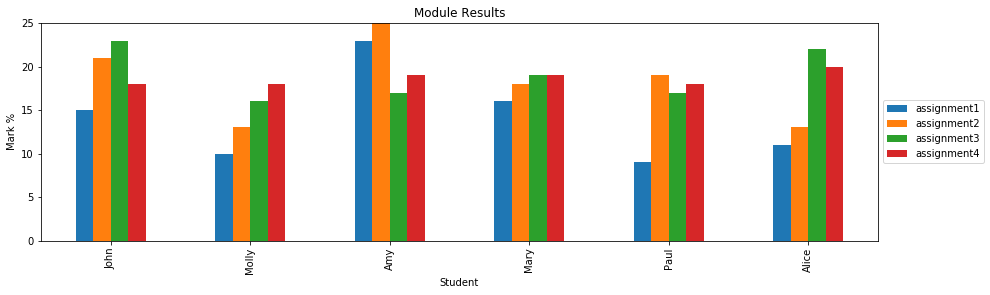

In [9]:
p = df.plot.bar(figsize=(15, 4))
# customize the axes and title
p.set_ylim((0,25))
p.set_xlabel("Student")
p.set_ylabel("Mark %")
p.set_title("Module Results")
# move the legend to outside the plot
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Or we can generate a stacked bar chart, which shows the cumulative total:

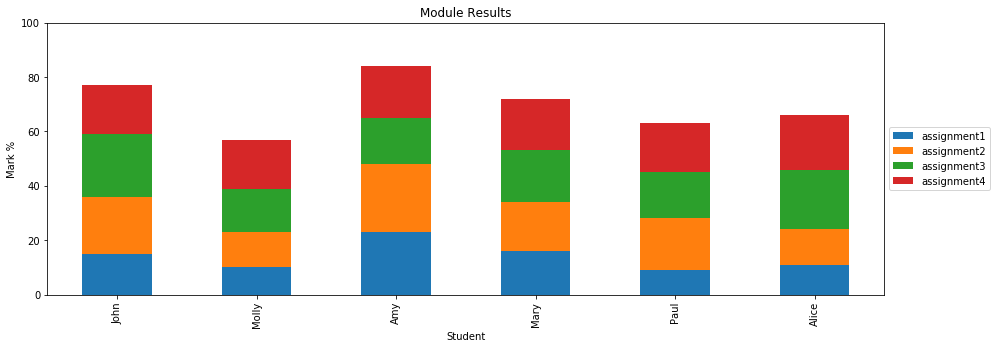

In [10]:
p = df.plot.bar(stacked=True,figsize=(15, 5))
# customize the axes and title
p.set_ylim((0,100))
p.set_xlabel("Student")
p.set_ylabel("Mark %")
p.set_title("Module Results")
# move the legend to outside the plot
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Plotting Examples - Iris Dataset

Each row in the dataset below represents a flower sample, which is categorised by species. We can look at how many flowers are categorised into each species.

In [11]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.7,2.8,4.1,1.3,versicolor
1,7.0,3.2,4.7,1.4,versicolor
2,5.8,2.7,3.9,1.2,versicolor
3,5.5,2.5,4.0,1.3,versicolor
4,7.7,3.0,6.1,2.3,virginica


In [12]:
species_counts = data["species"].value_counts()
species_counts

versicolor    50
virginica     44
setosa        16
Name: species, dtype: int64

The first way we can plot things is using the .plot extension from Pandas dataframes, which uses Matplotlib underneath. We could show the distribution of species visually as a *bar chart*:

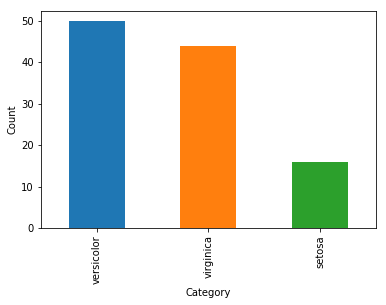

In [13]:
my_plot = species_counts.plot(kind="bar")
my_plot.set_xlabel("Category")
my_plot.set_ylabel("Count")

We could also represent the information above using a *pie chart*:

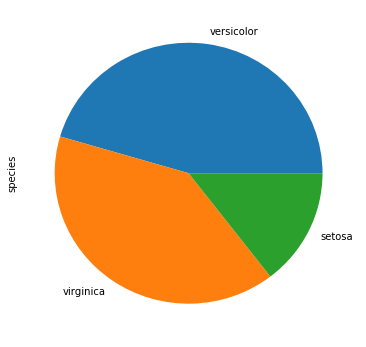

In [14]:
p = species_counts.plot(kind="pie", figsize=(6, 6))

To inspect the relationships between values for different features, we can create a 2D scatterplot of pairs of features in the Iris dataset.

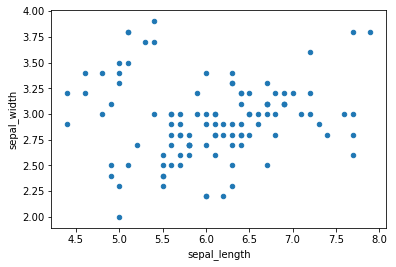

In [15]:
data.plot(kind="scatter", x="sepal_length", y="sepal_width")

We can also customise the appearance and size of the plot.

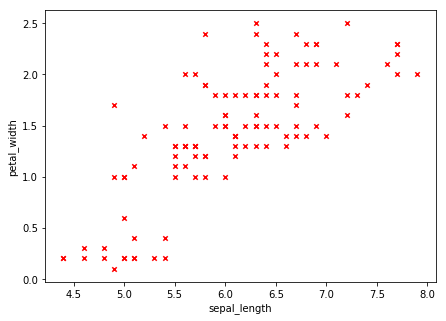

In [16]:
data.plot(kind="scatter", x="sepal_length", y="petal_width",marker='x',color='red',figsize=(7, 5))

To get a view of the distribution of values for a given feature, we can plot a *histogram* with the specified number of "bins":

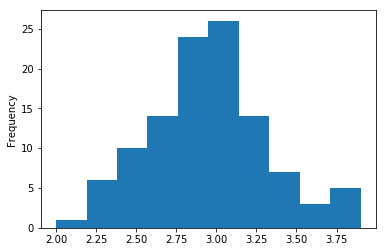

In [17]:
data["sepal_width"].plot(kind="hist",bins=10)

To get an overview of all the dataset, showing the relationship between all pairs of features and all feature histograms, we can create a *scatter matrix*:

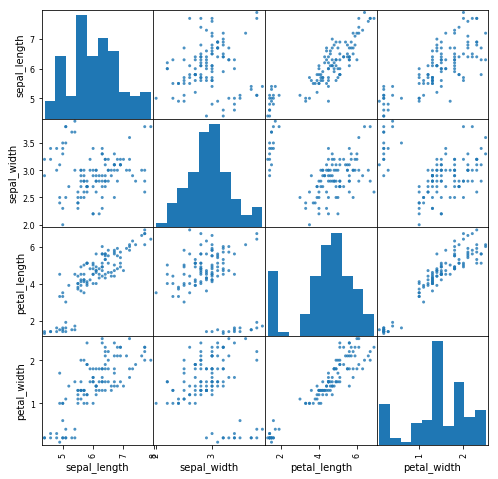

In [18]:
from pandas.plotting import scatter_matrix
s = scatter_matrix(data, alpha=0.8, figsize=(8, 8))  #alpha is opacity.

Another visualization technique provided by Pandas is *parallel coordinates*. This involves plotting each feature on a separate column and then draws lines connecting the features for each data sample. In the example below, the lines are coloured based on each flower's species values.

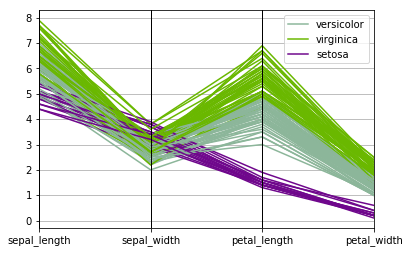

In [19]:
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(data, "species")

Let’s say we really like this plot and want to save it as a PNG image for a presentation.

In [21]:
fig = pc.get_figure()
fig.savefig("species-plot.png")